In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.ma as ma
from astropy.table import Table

In [20]:
import copy
t = Table.read('Tgas200_Wright2003_2MASS_FinCat_out.vot', format='votable')
print(t.colnames)


Source = t["Source"]
Gmag = t["X.Gmag."]
Vmag = t["VTmag"]
Jmag = t["Jmag"]
Hmag = t["Hmag"]
Kmag = t["Kmag"]
Qfl = t["Qfl"]
Bmag = t['BTmag']





['col1', 'angDist', 'd_arcsec', 'X_RAJ2000', 'X_DEJ2000', 'HIP', 'TYC2', 'Source', 'RA_ICRS', 'e_RA_ICRS', 'DE_ICRS', 'e_DE_ICRS', 'Plx', 'e_Plx', 'pmRA', 'e_pmRA', 'pmDE', 'e_pmDE', 'Dup', 'X.FG.', 'e_.FG.', 'X.Gmag.', 'Var', 'X_RAJ2000.1', 'X_DEJ2000.1', 'TYC1', 'TYC2.1', 'TYC3', 'RAJ2000', 'DEJ2000', 'VTmag', 'BTmag', 'r_SpType', 'Dist', 'Teff', 'SpType', 'X2MASS', 'RAJ2000.1', 'DEJ2000.1', 'errHalfMaj', 'errHalfMin', 'errPosAng', 'Jmag', 'Hmag', 'Kmag', 'e_Jmag', 'e_Hmag', 'e_Kmag', 'Qfl', 'Rfl', 'X', 'MeasureJD']


In [21]:
for i in range(0,len(Qfl)):
    if(Source.mask[i] == False):
        if(Qfl[i][0] == ord("A")):
            Jmag.mask[i] = False
        else:
            Jmag.mask[i] = True
        if(Qfl[i][1] == ord("A")):
            Hmag.mask[i] = False
        else:
            Hmag.mask[i] = True
        if(Qfl[i][2] == ord("A")):
            Kmag.mask[i] = False
        else:
            Kmag.mask[i] = True
print(len(Jmag))
print(len(Jmag.compressed()))

50093
48250


In [85]:
v = []
for i in range(Vmag):
    v.append(Vmag[i])
print(Vmag[0:100])

TypeError: only integer arrays with one element can be converted to an index

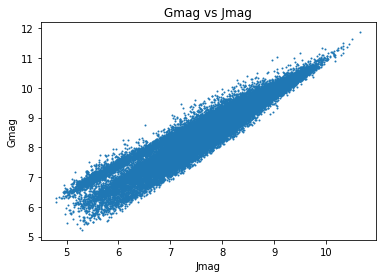

In [9]:
plt.title("Gmag vs Jmag")
plt.scatter(Jmag,Gmag,s=1.0)
plt.xlabel("Jmag")
plt.ylabel("Gmag")
plt.show()

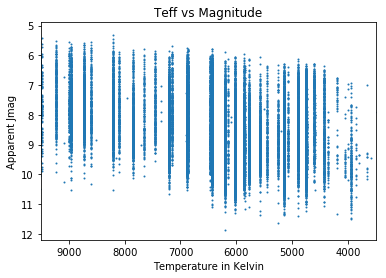

In [18]:
Teff = t["Teff"]
plt.title("Teff vs Magnitude")
plt.scatter(Teff,Gmag,s=1.0)
plt.xlabel("Temperature in Kelvin")
plt.ylabel("Apparent Jmag")
plt.xlim(3500,9500)

plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.show()

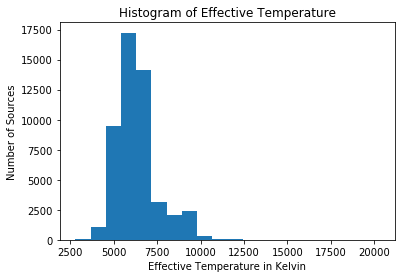

50093


In [73]:
temps = [2000,2500,3000,3500,4000,4500,5000,5500,6000,6500,7000,7500,8000,8500,9000,9500,10000,10500]
test = []
#for i in range(0,len(Teff)):
#    if(Teff[i] >= 5000 & Teff[i] <= 5500):
#        test.append(Teff[i])
#        print(test[i])

bins = 20
plt.xlabel("Effective Temperature in Kelvin")
plt.ylabel("Number of Sources")
plt.title("Histogram of Effective Temperature")
pltemp=plt.hist(Teff,bins)
plt.show()
print(len(Teff))

In [42]:
SpType = t['SpType']
Sp = [0.0]*len(SpType)
SpV = []
SPIII = []
temperature = t['Teff']
for i in range(0,len(SpType)):
    if(SpType.mask[i]==False):
        Spc = SpType[i].decode()
        if(len(Spc) > 2):
            for c in range(0,len(Spc)):
                if(Spc[c] == 'V'):
                    Sp[i] = Sp[i] + 5
                if(Sp[c] == 'I'):
                    Sp[i] = Sp[i] + 1
                if(Sp[c] == '+'):
                    Sp[i] = -30
        else:
            Sp[i] = 5.1
        
        if(Sp[i] == 6):
            Sp[i] = 4
        if(Sp[i] > 5.2):
            Sp[i] = -30
        if(Sp[i] == 11):
            Sp[i] = 4.5
        if(Sp[i] == 9):
            Sp[i] = 3.5
            
for i in range(0,len(Sp)):
    if(Sp[i] == 5.0):
        SpV.append(Sp[i])
    if(Sp[i] ==3 ):
        SpIII.append(Sp[i])
print(len(SpType))        
print(len(Sp))
print(len(SpV))
print(SpV[0:30])

50093
50093
22514
[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0]


In [55]:
para = t['Plx']
dist = 1000/para
AbsGmag = []
AbsVmag = []
AbsKmag = []
AbsHmag = []
AbsJmag = []
AbsBmag = []

for i in range(len(dist)):
        AbsGmag.append(Gmag[i] + 5 - 5*np.log10(dist[i]))
        AbsVmag.append(Vmag[i] + 5 - 5*np.log10(dist[i]))
        AbsKmag.append(Kmag[i] + 5 - 5*np.log10(dist[i]))
        AbsHmag.append(Hmag[i] + 5 - 5*np.log10(dist[i]))
        AbsJmag.append(Jmag[i] + 5 - 5*np.log10(dist[i]))
        AbsBmag.append(Bmag[i] + 5 - 5*np.log10(dist[i]))
print(np.mean(AbsHmag))

nan


/astromake/opt/python/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:583: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order, subok=True)


In [59]:
nan = 0
for i in range(0,len(AbsHmag)):
    if(str(AbsHmag.mask[i])==True):
        nan = nan +1
print(nan)

AttributeError: 'list' object has no attribute 'mask'

GmagV = []
VmagV = []
KmagV = []
HmagV = []
JmagV = []
TotalV = 0

for i in range(len(Sp)):
    if(5 in Sp[i] or 5.1 in Sp[i]):
        GmagV.append(AbsGmag[i])
        VmagV.append(AbsVmag[i])
        KmagV.append(AbsKmag[i])
        HmagV.append(AbsHmag[i])
        JmagV.append(AbsJmag[i])
        TotalV = TotalV + 1
    
        
        
#print('There are ', TotalV, 'Main Sequence stars')
#print(np.mean(VmagV))


In [24]:
GmagV = [] 
VmagV = [] 
KmagV = [] 
HmagV = [] 
JmagV = [] 
BmagV = []
TotalV = 0
for i in range(len(Sp)): 
    if('5.0' in str(Sp[i])): 
        GmagV.append(AbsGmag[i]) 
        VmagV.append(AbsVmag[i]) 
        KmagV.append(AbsKmag[i]) 
        HmagV.append(AbsHmag[i]) 
        JmagV.append(AbsJmag[i])
        BmagV.append(AbsBmag[i])
        TotalV = TotalV + 1
#print('There are ', TotalV, 'Main Sequence stars')
#print(np.mean(VmagV))
print(BmagV[0:20])

[1.4783930778503418, 4.8138687610626221, 2.1393182277679443, 1.8806251287460327, 5.2165861129760742, 6.7565220594406128, 4.2880363464355469, 4.9412219524383545, 5.2503769397735596, 4.4245645999908447, 3.7984733581542969, 1.919757604598999, 2.3844528198242188, 4.2413432598114014, 1.9458460807800293, 4.4787747859954834, 1.4253709316253662, 4.8061437606811523, 3.9779989719390869, 6.1196740865707397]


0


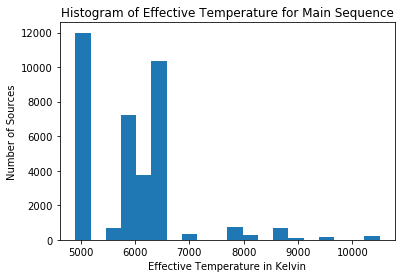

In [40]:
Temps= []
length = 0
for i in Teff:
    if(Sp[i] == 5.0):
        Temps.append(Teff[i])
        if(5000.0 <= Teff[i] <= 5500.0):
            length = length + 1
        
print(length)

bins = 20
plt.xlabel("Effective Temperature in Kelvin")
plt.ylabel("Number of Sources")
plt.title("Histogram of Effective Temperature for Main Sequence")
pltemp=plt.hist(Temps,bins)
plt.show()

In [53]:
Teff = t['Teff']
temps = [4000.0,4500.0,5000.0,5500.0,6000.0,6500.0,7000.0,7500.0,8000.0,8500.0,9000.0,9500.0,10000.0]
EffWave = [445,551,600,1220,1630,2190]
# Splits up all main sequence stars based on their effective temperature

for i in temps:
    sources = 0
    tempRange = []
    GmagV = []
    VmagV = []
    KmagV = []
    HmagV = []
    JmagV = []
    BmagV = []
    for j in range(0,len(Teff)):
        if(Sp[j] in SpV):
            if(i <= Teff[j] <= (i+500.0)):
                
                tempRange.append(Teff[j])
                GmagV.append(AbsGmag[j])
                VmagV.append(AbsVmag[j])
                KmagV.append(AbsKmag[j])
                HmagV.append(AbsHmag[j])
                JmagV.append(AbsJmag[j])
                BmagV.append(AbsBmag[j])
                sources = sources + 1
    #MeanTemp = np.mean(tempRange)
    #MinTemp = np.min(tempRange)
    #MaxTemp = np.max(tempRange)
    #TempStd = np.std(tempRange)
    MeanGmag = np.mean(GmagV)
    MeanVmag = np.mean(VmagV)
    MeanHmag = np.mean(HmagV)
    MeanJmag = np.mean(JmagV)
    MeanKmag = np.mean(KmagV)
    MeanBmag = np.mean(BmagV)
    #GmagStd = np.std(GmagV)
    #HmagStd = np.std(HmagV)
    #VmagStd = np.std(VmagV)
    #JmagStd = np.std(JmagV)
    #KmagStd = np.std(KmagV)
    #BmagStd = np.std(BmagV)
    Mags = [MeanBmag,MeanVmag,MeanGmag,MeanJmag,MeanHmag,MeanKmag]
    #Mags = [MeanKmag,MeanHmag,MeanJmag,MeanGmag,MeanVmag]
    #plt.xlabel('Effective Wavelength')
    #plt.ylabel('Absolute Magnitude')
    #plt.title('Absolute Magnitude SED for '+ str(i)+'-'+ str(i+500) + ' K')
    #plt.scatter(EffWave,Mags)
    #plt.gca().invert_yaxis()
    #plt.errorbar(EffWave,Mags,[BmagStd,VmagStd,GmagStd,JmagStd,HmagStd,KmagStd])
    #plt.show()
    
    #print('Number of Stars: ', sources)
    #print('Average Effective Temp in K: ', MeanTemp)
    #print('Standard Deviation of Temp in K: ', TempStd)
    #print('Min Temp: ', MinTemp, '  Max Temp: ', MaxTemp)
    print('Average Bmag: ', MeanBmag)
    print('Average Vmag: ', MeanVmag)
    print('Average Gmag: ', MeanGmag)
    print('average Hmag: ', MeanHmag)
    print('average Jmag: ', MeanJmag)
    print('average Kmag: ', MeanKmag)
    #print('Standard Deviation of Gmag: ',GmagStd)
    #print(MeanVmag)
        

/astromake/opt/python/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:583: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order, subok=True)


Average Bmag:  7.41889070433
Average Vmag:  6.04928490176
Average Gmag:  nan
average Hmag:  nan
average Jmag:  nan
average Kmag:  nan


KeyboardInterrupt: 

/astromake/opt/python/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:583: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order, subok=True)


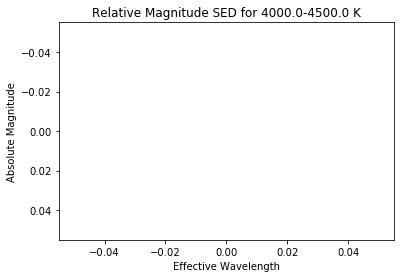

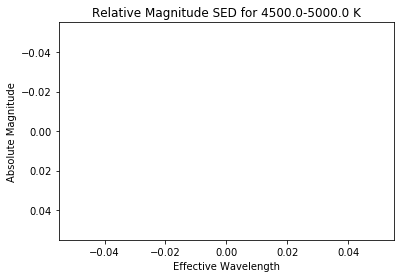

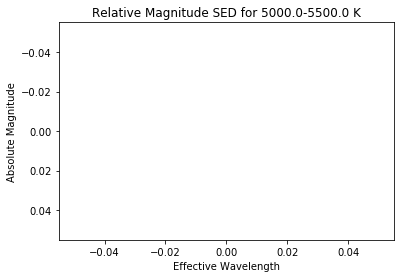

KeyboardInterrupt: 

In [51]:
for i in temps:
    sources = 0
    tempRange = []
    GmagV = []
    VmagV = []
    KmagV = []
    HmagV = []
    JmagV = []
    BmagV = []
    for j in range(0,len(Teff)):
        if(Sp[j] in SpV):
            if(i <= Teff[j] <= i+500):
                tempRange.append(Teff[j])
                GmagV.append(AbsGmag[j]-AbsGmag[j])
                VmagV.append(AbsGmag[j]-AbsVmag[j])
                KmagV.append(AbsGmag[j]-AbsKmag[j])
                HmagV.append(AbsGmag[j]-AbsHmag[j])
                JmagV.append(AbsGmag[j]-AbsJmag[j])
                BmagV.append(AbsGmag[j]-AbsBmag[j])
                sources = sources + 1
    
    MeanGmag = np.mean(GmagV)
    MeanVmag = np.mean(VmagV)
    MeanHmag = np.mean(HmagV)
    MeanJmag = np.mean(JmagV)
    MeanKmag = np.mean(KmagV)
    MeanBmag = np.mean(BmagV)
    
    Mags = [MeanBmag,MeanVmag,MeanGmag,MeanJmag,MeanHmag,MeanKmag]
    #Mags = [MeanKmag,MeanHmag,MeanJmag,MeanGmag,MeanVmag]
    plt.xlabel('Effective Wavelength')
    plt.ylabel('Absolute Magnitude')
    plt.title('Relative Magnitude SED for '+ str(i)+'-'+ str(i+500) + ' K')
    plt.scatter(EffWave,Mags)
    plt.gca().invert_yaxis()
    plt.show()
    

/astromake/opt/python/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Warning: converting a masked element to nan.
  """Entry point for launching an IPython kernel.
/astromake/opt/python/anaconda3/lib/python3.6/site-packages/numpy/ma/core.py:2766: UserWarning: Warning: converting a masked element to nan.
  order=order, subok=True, ndmin=ndmin)


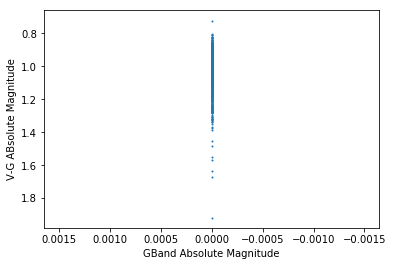

6
nan


In [52]:
VmG = np.array(JmagV) - np.array(GmagV)
plt.xlabel('GBand Absolute Magnitude')
plt.ylabel('V-G ABsolute Magnitude')
plt.scatter(GmagV,VmG,s=1.0)
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.show()

print(len(Mags))
print((MeanGmag))

In [49]:
print(GmagV[0:5])

[1.4566256999969482, 1.4566256999969482, 1.4566256999969482, 1.4566256999969482, 1.4566256999969482]


In [11]:
# This cell contains old code. I do not want to erase it until I am 100% sure I do not require it. Once final SED
# models are complete, I will remove it
Teff = t['Teff']
Plx = t["Plx"]

temp = np.linspace(3500,10000,num=14)
print(temp)
#18 sets of ranges
tempRange = []
PlxRange = []
JmagRange = []
GmagRange = []
HmagRange = []
KmagRange = []
VmagRange = []
dist = []
Sp_str = str(Sp)

def AbsoluteMag(mag,dist):
    return mag - (5*np.log10(dist/10))

for low in temp:
    high = low + 500
    for i in range(0,len(Teff)):
        if(low <= Teff[i] <= high):
            if(Teff.mask[i] == False):
                tempRange.append(Teff[i])
                JmagRange.append(Jmag[i])
                GmagRange.append(Gmag[i])
                HmagRange.append(Hmag[i])
                KmagRange.append(Kmag[i])
                VmagRange.append(Vmag[i])
                PlxRange.append(Plx[i])
                dist.append(1000/Plx[i])
    #plt.hist(tempRange,bins=25)
    #TempValMask = ma.masked_outside(temp,low,high)
    #TempValComp = TempValMask.compressed()
    #plt.hist(TempValComp,bins=15)
    #plt.show()    
    for j in range(0,len(tempRange)):
        JmagRange[j] = AbsoluteMag(JmagRange[j],dist[j])
        GmagRange[j] = AbsoluteMag(GmagRange[j],dist[j])
        HmagRange[j] = AbsoluteMag(HmagRange[j],dist[j])
        KmagRange[j] = AbsoluteMag(KmagRange[j],dist[j])
        VmagRange[j] = AbsoluteMag(VmagRange[j],dist[j])
    print("There are ", len(tempRange), " stars in the range", low, " - ", high)
    print("\n","Mean: ", np.mean(tempRange))
    print("Standard Deviation: ", np.std(tempRange))
    print("Max: ", np.max(tempRange))
    print("Min: ", np.min(tempRange))
    print("\n")
    print("Standard Deviation for Absolute Jmag", np.std(JmagRange))
    #print("There are ", len(TempValComp), "in the range", low, " - ", high)
    #tempRange = []

[  3500.   4000.   4500.   5000.   5500.   6000.   6500.   7000.   7500.
   8000.   8500.   9000.   9500.  10000.]
There are  275  stars in the range 3500.0  -  4000.0

 Mean:  3920.14545455
Standard Deviation:  93.6180670562
Max:  4000
Min:  3530


Standard Deviation for Absolute Jmag 

C:\Users\Kevin.Hall\Anaconda3\lib\site-packages\numpy\ma\core.py:4185: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


nan
There are  1131  stars in the range 4000.0  -  4500.0

 Mean:  4259.34571176
Standard Deviation:  219.736430467
Max:  4420
Min:  3530


Standard Deviation for Absolute Jmag nan
There are  6223  stars in the range 4500.0  -  5000.0

 Mean:  4673.33440463
Standard Deviation:  231.626417363
Max:  4900
Min:  3530


Standard Deviation for Absolute Jmag nan
There are  10828  stars in the range 5000.0  -  5500.0

 Mean:  4883.65903214
Standard Deviation:  304.259629527
Max:  5500
Min:  3530


Standard Deviation for Absolute Jmag nan
There are  15768  stars in the range 5500.0  -  6000.0

 Mean:  5168.48236936
Standard Deviation:  494.176794431
Max:  5860
Min:  3530


Standard Deviation for Absolute Jmag nan
There are  36728  stars in the range 6000.0  -  6500.0

 Mean:  5786.07166195
Standard Deviation:  639.840071778
Max:  6470
Min:  3530


Standard Deviation for Absolute Jmag nan
There are  41701  stars in the range 6500.0  -  7000.0

 Mean:  5917.38951104
Standard Deviation:  698.52497

In [45]:
test = 0
for i in range(0,len(Teff)):
    if(str(SpV) in str(Sp[i])):
        if(5000.0 <= Teff[i] <= 5500.0):
            test = test + 1
        
print(test)
      

KeyboardInterrupt: 